# Capstone Project - Prediction of Accident Severity
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Business Problem <a name="introduction"></a>

### Background

Every year, car accidents cause more injuries and deaths than any other type of personal injury. There are many factors that go into whether a person gets into a car accident that the severity of the event. With the progress of technology included in cars and their new capabilities, it would be important to have the tools and means available to provide drivers with a warning, given the weather and road conditions about the possibility of getting into a car accident and how severe it would be.  Therefore, the driver would drive more carefully or even change his/her driving route if he/she is able to do so.

### Problem

Data that might contribute to determining the severity of a car accident may include weather, road conditions, lighting conditions, and other metrics that would help describe the surrounding environment of the driver.  This project aims to predict how severe an accident would be based on these data

### Interest

Obviously, it would be of great interest for drivers to have to avoid an accident from knowing how severe it may be by driving more carefully.  This will also enable transport, security, and emergency agencies all around the world to have different predictive models for quickly analyzing crashes when they happen and dispatch an appropriate response swiftly.

## Data <a name="data"></a>

### Data Sources

The data utilized for this report came from collision data provided by SPD and recorded by Traffic Records. This dataset includes all types of collisions from 2004 to present, where collisions will display at the intersection or mid-block of a segment.  

### Data Understanding

The data was downloaded from the course organizers at IBM. Let's first import the appropriate packages and download the dataset:

In [2]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
!wget -O DataCollisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-28 16:32:59--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘DataCollisions.csv’

100%[======================================>] 73,917,638  40.4MB/s   in 1.7s   

2020-08-28 16:33:01 (40.4 MB/s) - ‘DataCollisions.csv’ saved [73917638/73917638]



In [4]:
df = pd.read_csv("DataCollisions.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Let's see some basic info about each column: 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

The variable we are predicting is **SEVERITYCODE**. Let's take a look at the breakdown by severity code:

In [5]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Here, we have the only values of 1 and 2 for severity code. According to the metadata, here is what they correspond to:

| Severity Code | Description |
|---------------|-------------|
| 1             | Prop Damage |
| 2             | Injury      |



If we look at the null values, the original data have many columns with having NAN values. In our analysis, we need to either remove or fill in the rows with missing data.

In [6]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

### Data Cleaning

Here, we need to clean the dataset to fill in missing values for the columns of interest. Moreover, we will change ambiguous values in the WEATHER, ROADCOND, and LIGHTCOND columns to NaN so that they can be removed later on during feature selection. We will also remove the irrelevant columns

In [7]:
#PEDROWNOTGRNT only Y has been entered. Assuming other values to be N
df['PEDROWNOTGRNT'].fillna(0, inplace=True)
df['PEDROWNOTGRNT'].replace("N", 0, inplace=True)
df['PEDROWNOTGRNT'].replace("Y", 1, inplace = True)

#SPEEDING only Y has been entered. Assuming other values to be N
df['SPEEDING'].fillna(0, inplace=True)
df['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)

#INATTENIONIND only Y has been entered. Assuming other values to be N
df['INATTENTIONIND'].fillna(0, inplace=True)
df['INATTENTIONIND'].replace("N", 0, inplace=True)
df['INATTENTIONIND'].replace("Y", 1, inplace = True)

#UNDERINFL has both quantitative and qualitative values so we need to convert to all quantitative values
df['UNDERINFL'].fillna(0, inplace=True) #Assuming blanks to be N
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df['UNDERINFL']=df['UNDERINFL'].astype(dtype='int64')


#Changing the values of 'Unknown' and 'Other' in WEATHER column to NaN
df['WEATHER'].replace(to_replace=['Unknown','Other'], value=[np.nan,np.nan],inplace=True)

#Changing the values of 'Unknown' and 'Other' in ROADCOND column to NaN
df['ROADCOND'].replace("Unknown", np.nan, inplace = True)
df['ROADCOND'].replace("Other", np.nan, inplace = True)

#Changing the values of 'Unknown' and 'Other' in LIGHTCOND column to NaN
df['LIGHTCOND'].replace("Unknown", np.nan, inplace = True)
df['LIGHTCOND'].replace("Other", np.nan, inplace = True)



### Feature Selection

In [8]:
#Choosing the appropriate columns
df_feature = df[['SEVERITYCODE','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','ST_COLCODE']]
df_feature.isnull().sum()

SEVERITYCODE          0
ADDRTYPE           1926
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
SDOT_COLCODE          0
INATTENTIONIND        0
UNDERINFL             0
WEATHER           21004
ROADCOND          20222
LIGHTCOND         18878
PEDROWNOTGRNT         0
SPEEDING              0
ST_COLCODE           18
dtype: int64

In [9]:
#Drop null data from our feature set
df_feature.dropna(axis=0,inplace=True)
df_feature.isnull().sum()


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


SEVERITYCODE      0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
SDOT_COLCODE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
ST_COLCODE        0
dtype: int64

We also need to convert our categorical variables into numerical values:

In [10]:
#ADDRTYPE
df_feature[['Alley', 'Block', 'Intersection']] = pd.get_dummies(df_feature['ADDRTYPE'])
df_feature.drop(['ADDRTYPE'], axis=1, inplace=True)


#WEATHER
df_feature[pd.get_dummies(df_feature['WEATHER']).columns] = pd.get_dummies(df_feature['WEATHER'])
df_feature.drop(['WEATHER'], axis=1, inplace=True)


#ROADCOND
df_feature[pd.get_dummies(df_feature['ROADCOND']).columns] = pd.get_dummies(df_feature['ROADCOND'])
df_feature.drop(['ROADCOND'], axis=1, inplace=True)


#LIGHTCOND
df_feature[pd.get_dummies(df_feature['LIGHTCOND']).columns] = pd.get_dummies(df_feature['LIGHTCOND'])
df_feature.drop(['LIGHTCOND'], axis=1, inplace=True)

#STCOLCODE
df_feature['ST_COLCODE'].replace(to_replace=' ', value=np.nan,inplace=True)
df_feature['ST_COLCODE'].fillna(method='ffill', inplace = True)
df_feature['ST_COLCODE']=df_feature['ST_COLCODE'].astype(dtype='int64')

#Check the dataset
df_feature.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inpl

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,11,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,16,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,4,0,0,3,14,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3,0,0,3,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,0,2,11,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


### Data Exploration

#### Collision Type and Number of Collisions

Text(0, 0.5, 'Number of Collisions')

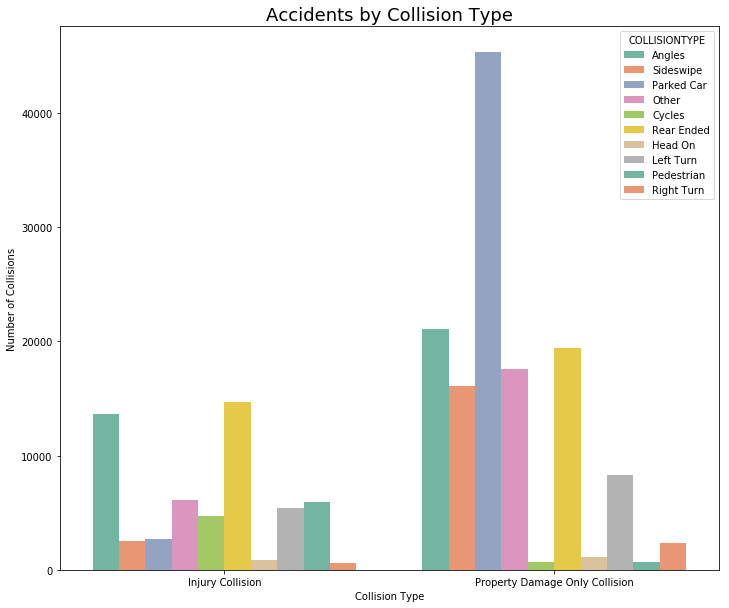

In [7]:
plt.figure(figsize=(26, 10))
plt.subplot(1,2,1)
sns.countplot(x="SEVERITYDESC",hue="COLLISIONTYPE", data=df, palette="Set2")
plt.title('Accidents by Collision Type', fontsize=18)
plt.xlabel("Collision Type")
plt.ylabel("Number of Collisions")

For Injury Collisions, we seee that most accidents occur due to cars getting hit on the rear end or at an angle. For property damage, most collisions occur from hitting a parked car.

#### Location Type and Number of Collisions

Text(0.5, 0, 'Location Type')

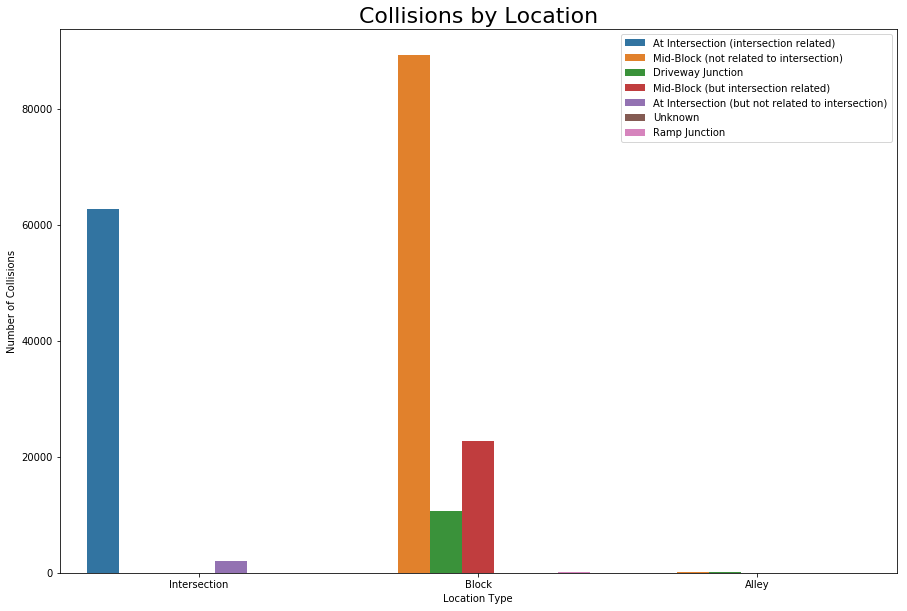

In [5]:
plt.figure(figsize=(15,10))
sns.countplot(x="ADDRTYPE", hue="JUNCTIONTYPE", data=df )
plt.title("Collisions by Location", fontsize=22)
plt.legend(loc="upper right")
plt.ylabel("Number of Collisions")
plt.xlabel("Location Type")

Most block-related collisions seem to happen mid-block, away from the intersection. Also, there seems to be very little collisions occurring in an alley.

#### Day of the Week and Number of Collisions

In [66]:
#Change the date format to a day of the week
df['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df['DAY'].replace(to_replace=[0,1,2,3,4,5,6], value=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],inplace=True)


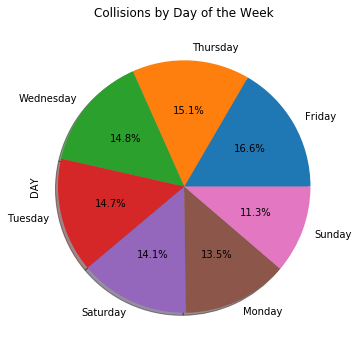

In [71]:
df_day= df['DAY'].value_counts()

df_day.plot(kind='pie',
            figsize=(5,6),
            autopct = '%1.1f%%',
            shadow = True)

plt.title('Collisions by Day of the Week')
plt.axis('equal')

plt.show()

Although the percentage of getting into an accident is roughly the same across days, it seems as though most accidents occur on a weekday as opposed to the weekend

#### Weather and Number of Collisions

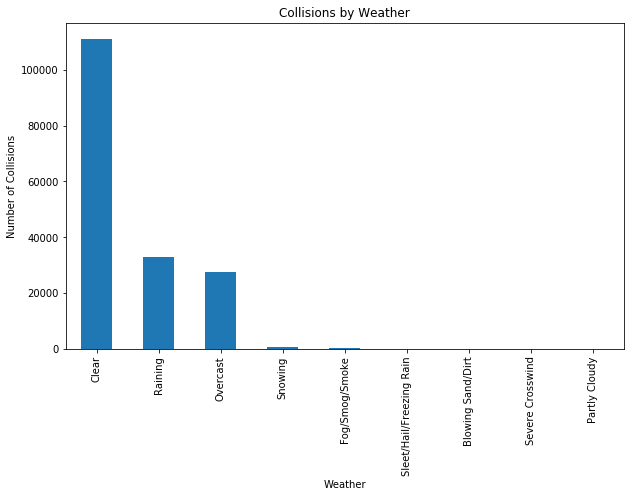

In [60]:
df_weather = df['WEATHER'].value_counts()
df_weather.columns = ['Weather','Count']

df_weather.plot(kind='bar', figsize = (10,6))
plt.xlabel('Weather')
plt.ylabel('Number of Collisions')
plt.title('Collisions by Weather')

plt.show()

Based on the bar chart above, it seems that most collisions actually occur on a clear day.  Therefore, it does not seem like weather plays an important factor when predicting collisions.

### Correlation between Variables 

In [11]:
df_feature.corr().style.background_gradient(cmap='Blues').format("{:.3f}")

Again, it seems as though weather does not particularly have any correlation with accident severity.

In [12]:
df_feature[['SEVERITYCODE', 'Intersection', 'Alley', 'Block']].corr().style.background_gradient(cmap='Reds').format("{:.3f}")

,SEVERITYCODE,Intersection,Alley,Block
SEVERITYCODE,1.000,0.175,-0.025,-0.172
Intersection,0.175,1.000,-0.045,-0.992
Alley,-0.025,-0.045,1.000,-0.078
Block,-0.172,-0.992,-0.078,1.000


No strong correlation can be seen between the location and severity of the accident.

In [13]:
df_feature[['SEVERITYCODE', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].corr().style.background_gradient(cmap='Blues').format("{:.3f}")

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000,0.114,0.241,0.211,-0.078
PERSONCOUNT,0.114,1.000,-0.031,-0.046,0.402
PEDCOUNT,0.241,-0.031,1.000,-0.020,-0.315
PEDCYLCOUNT,0.211,-0.046,-0.020,1.000,-0.306
VEHCOUNT,-0.078,0.402,-0.315,-0.306,1.000


It looks like the most severe injuries occur when involving pedestrians and cyclists.

## Methodology <a name="methodology"></a>

In this project we will direct our efforts in predicting **accident severity**.

In the first step we have collected the required data, cleaned the data, chose variables that were related to the problem at hand, and converted all of our qualitative variables into quantitative ones

The second step involved exploratory analysis where we examined various factors that played a role in collisions from a data visualization perspective. Moreover, we examined the correlation between severity code and all of our variables.

In the next step, we will utilize **classification** as our machine learning algorithm method since we are categorizing unknown items into a discrete set of categories. In this case, we need to determine which severity code, 1 or 2, a case falls into given the weather and road conditions.

Note: K-Nearest Neighbors was attempted but the system kept crashing when trying to determine the best value for k.  Support Vector Machine was not utilized because it does not work well with very large datasets.

## Analysis <a name="analysis"></a>

### Normalize the Data

In [29]:
from sklearn import preprocessing

In [30]:
X = df_feature.drop(['SEVERITYCODE'],axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:1]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.35890684, -0.19693643, -0.1786537 ,  0.05106933, -0.51424569,
        -0.44984467, -0.23631762, -0.16488274, -0.23750001, -0.8211427 ,
        -0.05929931, -1.31759763,  1.32761033, -0.01575573, -1.33444817,
        -0.05694515,  2.30508388, -0.00543565, -0.48760266, -0.0121552 ,
        -0.02503508, -0.06982125, -1.58335556, -0.0798056 , -0.0188327 ,
        -0.01945056, -0.07016227, -0.02443714,  1.63357494, -0.09136593,
        -0.08118136, -0.61631507, -0.00687567, -0.1200169 ,  0.71374207,
        -0.18514921]])

In [31]:
y = df_feature['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

### Split the Dataset into Test and Train Sets

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train , x_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=3)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (135384, 36) (135384,)
Test set: (33847, 36) (33847,)


### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(x_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
yhat_DT = DT_model.predict(x_test)
yhat_DT

array([2, 1, 1, ..., 1, 1, 1])

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(x_train,y_train)
LR_model

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
yhat_LR = LR_model.predict(x_test)
yhat_LR

array([2, 1, 1, ..., 1, 1, 1])

### Model Evaluation

In [53]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [54]:
#Decision Tree

print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_DT))
print("DT Precision Score: %.2f" % precision_score(y_test, yhat_DT) )
print("DT Recall Score: %.2f" % recall_score(y_test, yhat_DT) )
print("DT F1-score: %.2f" % f1_score(y_test, yhat_DT, average='weighted') )



#Logistic Regression

print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, yhat_LR))
print("LR Precision Score: %.2f" % precision_score(y_test, yhat_LR) )
print("LR Recall Score: %.2f" % recall_score(y_test, yhat_LR) )
print("LR F1-score: %.2f" % f1_score(y_test, yhat_LR, average='weighted') )


DT Jaccard index: 0.73
DT Precision Score: 0.71
DT Recall Score: 0.99
DT F1-score: 0.66
LR Jaccard index: 0.73
LR Precision Score: 0.72
LR Recall Score: 0.97
LR F1-score: 0.68


## Results and Discussion <a name="results"></a>


Based on our analysis of the data, we have some key observations:

1. Most accidents occur during weekdays at intersections
2. Weather conditions do not play a significant role in accidents
3. Road and lighting conditions have a weak correlation with accidents
4. Between blocks, maximum accidents occur at mid-blocks
5. In collision accidents, maximum damage is done to parked cars

In this project I have identified the relation between accidents and accident severity with several human, environmental and location attributes. Maximum accidents occur at intersections related to pedestrians or cyclists. I analysed different machine learning classification methods to classify accidents as injury or collision accidents. The Logistic Regression model offered maximum accuracy. It correctly predicted 72% as injury collisions. This data could be used by enable transport, security, and emergency agencies to better understand car accidents and take preventative measures to prevent them. It is also aimed at us, whether we are pedestrians, cyclists or vehicle owners to be more careful at intersections to prevent an accident.

## Conclusion <a name="conclusion"></a>


I could achieve an accuracy of 72% using the Logistic Regreession Classifier. There are a lot of variances which have not been accounted for. However, using this project we could really narrow down to the location(=) where maximum accidents occur and the most affected. We also understood that there is very less importance of human and weather factors in causing an accident. The prediction could be improved by capturing real time data during accidents.